In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X = df.iloc[:, :-1]  # Assume the first 14 columns are the independent variables
y = df.iloc[:, -1]   # Assume the 15th column is the dependent variable

# Set up the random forest model and the range of parameters to be tuned
model_rf = RandomForestClassifier()

# Set the parameter range you want to search
# Note: I'm setting an example range here based on a given set of best parameters, the actual range can be adjusted according to your needs
param_grid_rf = {
    'n_estimators': [120, 142, 170],     # Number of trees
    'max_depth': [10, 13, 16],           # Maximum depth of the trees
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required at each leaf node
}

# Initialize the grid search object
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, 
                              scoring='accuracy', cv=5, verbose=1)

# Perform grid search
grid_search_rf.fit(X, y)

# Output the best hyperparameters and corresponding scores
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best Score for Random Forest: {grid_search_rf.best_score_}')

# Build the final random forest model with the best hyperparameters
final_model_rf = RandomForestClassifier(**grid_search_rf.best_params_)
final_model_rf.fit(X, y)  # Fit the final model using the entire training set

# If you need to save the final model
from joblib import dump
dump(final_model_rf, 'final_model_rf.joblib')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Random Forest: {'max_depth': 16, 'min_samples_leaf': 1, 'n_estimators': 170}
Best Score for Random Forest: 0.91381332789892


['final_model_rf.joblib']

In [14]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Load the training data
# Assuming that the dataset file is "After_Selection_Model_Development_Data.xlsx" and the training data is located in a sheet named "training"
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1].values  # Features X
y_train = df_training.iloc[:, -1].values   # Labels y

# Initialize the SVM model
svm = SVC(kernel='poly', degree=2, C=1, probability=True)

# Possible ranges of hyperparameters
param_grid = {
    'C': [0.5, 1, 2],             # Regularization parameter
    'degree': [2, 3, 4],          # Degree of the polynomial kernel function
    # Multiple kernel functions could be considered
    'kernel': ['poly'],           # The type of kernel to be used by the algorithm
    # The coef0 parameter of the polynomial kernel could also be tuned, but it is not mentioned in the information you've provided
}

# Initialize the grid search object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1)

# Execute the grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for SVM: {grid_search.best_params_}')
print(f'Best Score for SVM: {grid_search.best_score_}')

# Construct the final SVM model with the best hyperparameters and probability=True
best_svm_params = grid_search.best_params_.copy()
best_svm_params['probability'] = True  # Ensure the final model can output prediction probabilities
best_svm = SVC(**best_svm_params)
best_svm.fit(X_train, y_train)

# If you need to save the final model
from joblib import dump
dump(best_svm, 'best_svm.joblib')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for SVM: {'C': 2, 'degree': 3, 'kernel': 'poly'}
Best Score for SVM: 0.5505127369064602


['best_svm.joblib']

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_model import GridSearchCV
from joblib import dump

# Load the training data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are features X
y_train = df_training.iloc[:, -1]   # The 15th column is the label y

# Initialize the logistic regression classifier, L2 regularization is similar to Ridge regression
logistic_clf = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=5000)

# Possible range of hyperparameters
param_grid = {
    'C': [10.0, 1.0, 0.1, 0.01]  # Inverse of the regularization strength, similar to alpha in Ridge regression
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=logistic_clf, param_grid=param_grid, 
                            scoring='accuracy', cv=5, verbose=1)

# Perform grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for Logistic Regression: {grid_search.best_params_}')
print(f'Best Score for Logistic Regression: {grid_search.best_score_}')

# Build the final logistic regression model with the best hyperparameters
final_logistic_clf = LogisticRegession(**grid_search.best_params_, penalty='l2', solver='lbfgs', max_iter=5000)
final_logistic_clf.fit(X_train, y_train)

# If you need to save the model
dump(final_logistic_clf, 'final_logistic_clf.joblib')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Logistic Regression: {'C': 10.0}
Best Score for Logistic Regression: 0.6635300590992459


['final_logistic_clf.joblib']

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are features X
y_train = df_training.iloc[:, -1]   # The 15th column is the label y

# Initialize the decision tree classifier
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=15)

# Possible range of hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],  # Functions to measure the quality of a split
    'max_depth': [10, 15, 20, None],   # The maximum depth of the tree
    'min_samples_split': [2, 4, 6],    # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],     # The minimum number of samples required at a leaf node
}

# Initialize grid search
grid_search = GridSearchCV(estimator=dt_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for Decision Tree: {grid_search.best_params_}')
print(f'Best Score for Decision Tree: {grid_search.best_score_}')

# Construct the final decision tree model with the best hyperparameters
final_dt_clf = DecisionTreeClassifier(**grid_search.best_params_)
final_dt_clf.fit(X_train, y_train)

# If you need to save the model
from joblib import dump
dump(final_dt_clf, 'final_dt_clf.joblib')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score for Decision Tree: 0.8484528224984716


['final_dt_clf.joblib']

In [5]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are features X
y_train = df_training.iloc[:, -1]   # The 15th column is the label y

# Initialize the Multilayer Perceptron classifier
mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 46))

# Possible range of hyperparameters
param_grid = {
    'alpha': [1e-4, 1e-5, 1e-6],  # L2 regularization term strength
    'hidden_layer_sizes': [(10, 46), (50, 100), (100,)],  # Sizes of hidden layers
}

# Initialize grid search
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for Multilayer Perceptron: {grid_search.best_params_}')
print(f'Best Score for Multilayer Perceptron: {grid_search.best_score_}')

# Construct the final Multilayer Perceptron model with the best hyperparameters
final_mlp_clf = MLPClassifier(**grid_search.best_params_)
final_mlp_clf.fit(X_train, y_train)

# If you need to save the model
from joblib import dump
dump(final_mlp_clf, 'final_mlp_clf.joblib')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the nu

Best Parameters for Multilayer Perceptron: {'alpha': 1e-06, 'hidden_layer_sizes': (50, 100)}
Best Score for Multilayer Perceptron: 0.6715198695740778


['final_mlp_clf.joblib']

In [6]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are the features X
y_train = df_training.iloc[:, -1]   # The 15th column is the label y

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(n_estimators=61, learning_rate=1.0, algorithm='SAMME.R')

# Possible range of hyperparameters
param_grid = {
    'n_estimators': [30, 61, 100],  # Maximum number of estimators
    'learning_rate': [0.5, 1.0, 1.5],  # Learning rate
}

# Initialize grid search
grid_search = GridSearchCV(estimator=ada_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform the grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for AdaBoost: {grid_search.best_params_}')
print(f'Best Score for AdaBoost: {grid_search.best_score_}')

# Construct the final AdaBoost model using the best hyperparameters
final_ada_clf = AdaBoostClassifier(**grid_search.best_params_)
final_ada_clf.fit(X_train, y_train)

# If you need to save the model
from joblib import dump
dump(final_ada_clf, 'final_ada_clf.joblib')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.

Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}
Best Score for AdaBoost: 0.7089101283880171


D:\Anaconda\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


['final_ada_clf.joblib']

In [9]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are features X
y_train = df_training.iloc[:, -1]   # The 15th column is label y

# Initialize the Gradient Boosting Decision Tree classifier
gbdt_clf = GradientBoostingClassifier(n_estimators=51, learning_rate=0.31, 
                                      max_depth=1, loss='log_loss')  # The loss parameter value has been changed here

# Possible range of hyperparameters
param_grid = {
    'n_estimators': [30, 51, 100],    # Number of boosting stages
    'learning_rate': [0.1, 0.31, 0.5], # Learning rate
    'max_depth': [1, 3, 5],            # Maximum depth of each regression estimator
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=gbdt_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform the grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for Gradient Boosting Decision Tree: {grid_search.best_params_}')
print(f'Best Score for Gradient Boosting Decision Tree: {grid_search.best_score_}')

# Construct the final GBDT model with the best hyperparameters
final_gbdt_clf = GradientBoostingClassifier(**grid_search.best_params_)
final_gbdt_clf.fit(X_train, y_train)

# If you need to save the model
from joblib import dump
dump(final_gbdt_clf, 'final_gbdt_clf.joblib')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters for Gradient Boosting Decision Tree: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
Best Score for Gradient Boosting Decision Tree: 0.8875594049317301


['final_gbdt_clf.joblib']

In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X = df_training.iloc[:, :-1]  # The first 14 columns are features X
y = df_training.iloc[:, -1]   # The 15th column is label y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the individual learners for the ensemble learner
log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
gnb_clf = GaussianNB()

# Create a voting classifier with 'soft' voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('dt', dt_clf),
        ('gnb', gnb_clf)
    ],
    voting='soft'
)

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Test the accuracy of the model
accuracy = voting_clf.score(X_test, y_test)
print(f'Voting Classifier Accuracy: {accuracy}')

# If needed, the accuracy for each independent learner in the voting classifier can also be calculated and printed
for clf_name, clf in voting_clf.named_estimators_.items():
    individual_accuracy = clf.score(X_test, y_test)
    print(f'{clf_name} Accuracy: {individual_accuracy}')

# If you need to save the model
from joblib import dump
dump(voting_clf, 'final_voting_clf.joblib')

Voting Classifier Accuracy: 0.8174037089871612
lr Accuracy: 0.6776034236804565
dt Accuracy: 0.8430813124108416
gnb Accuracy: 0.651925820256776


D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['final_voting_clf.joblib']

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
df_training = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="training")
X_train = df_training.iloc[:, :-1]  # The first 14 columns are the features X
y_train = df_training.iloc[:, -1]   # The 15th column is the label y

# Initialize the K-Nearest Neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=16, algorithm='auto', leaf_size=30, metric='minkowski', p=2)

# Possible range of hyperparameters
param_grid = {
    'n_neighbors': [5, 10, 16, 20],    # Number of neighbors
    'leaf_size': [20, 30, 40, 50],     # Leaf size
    'p': [1, 2],                       # p=1 corresponds to Manhattan distance, p=2 corresponds to Euclidean distance
    'weights': ['uniform', 'distance'] # Weighting function, 'uniform' means equal weights, 'distance' means weight inversely proportional to distance
}

# Initialize the grid search
grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1)

# Perform the grid search on the training set to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Output the best hyperparameters and score
print(f'Best Parameters for K-Nearest Neighbor: {grid_search.best_params_}')
print(f'Best Score for K-Nearest Neighbor: {grid_search.best_score_}')

# Construct the final KNN model with the best hyperparameters
final_knn_clf = KNeighborsClassifier(**grid_search.best_params_)
final_knn_clf.fit(X_train, y_train)

# If you need to save the model
from joblib import dump
dump(final_knn_clf, 'final_knn_clf.joblib')

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Parameters for K-Nearest Neighbor: {'leaf_size': 20, 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}
Best Score for K-Nearest Neighbor: 0.7782551457102099


['final_knn_clf.joblib']

In [18]:
import pandas as pd
from joblib import load
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Load the test data
df_test = pd.read_excel("After_Selection_Model_Development_Data.xlsx", sheet_name="test")
X_test = df_test.iloc[:, :-1]  # The first 14 columns are features X
y_test = df_test.iloc[:, -1]   # The 15th column is label y

# Pre-defined list of model filenames and dictionary for performance metrics
model_filenames = [
    'final_model_rf.joblib', 'best_svm.joblib', 'final_logistic_clf.joblib',
    'final_dt_clf.joblib', 'final_mlp_clf.joblib', 'final_ada_clf.joblib',
    'final_gbdt_clf.joblib', 'final_voting_clf.joblib', 'final_knn_clf.joblib'
]

model_names = [
    'Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree',
    'Multilayer Perceptron', 'AdaBoost', 'Gradient Boosting',
    'Voting Classifier', 'K-Nearest Neighbor'
]

# Initialize a dataframe to store the performance metrics
metrics_df = pd.DataFrame(index=['AUC', 'Accuracy', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'F1-score'],
                          columns=model_names)

# Define functions to calculate specificity and negative predictive value
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def npv_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fn)

# Loop through each model and calculate performance metrics
for model_filename, model_name in zip(model_filenames, model_names):
    # Load the model
    model = load(model_filename)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities used to calculate AUC
    
    # Calculate metrics
    auc = roc_auc_score(y_test, y_pred_proba)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = specificity_score(y_test, y_pred)
    ppv = precision_score(y_test, y_pred)
    npv = npv_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store performance metrics
    metrics_df.loc['AUC', model_name] = auc
    metrics_df.loc['Accuracy', model_name] = accuracy
    metrics_df.loc['Sensitivity', model_name] = sensitivity
    metrics_df.loc['Specificity', model_name] = specificity
    metrics_df.loc['PPV', model_name] = ppv
    metrics_df.loc['NPV', model_name] = npv
    metrics_df.loc['F1-score', model_name] = f1

# Print the performance metrics matrix
print(metrics_df)

D:\Anaconda\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


            Random Forest       SVM Logistic Regression Decision Tree  \
AUC              0.985964  0.658161            0.703982      0.885922   
Accuracy         0.941411  0.538615            0.655126      0.886152   
Sensitivity      0.970784  0.132802            0.675963      0.972112   
Specificity      0.911883  0.946595            0.634179      0.799733   
PPV              0.917189  0.714286            0.650064      0.829932   
NPV              0.968794  0.520558             0.66064      0.966129   
F1-score         0.943226  0.223964             0.66276      0.895413   

            Multilayer Perceptron  AdaBoost Gradient Boosting  \
AUC                      0.732704  0.782215          0.980218   
Accuracy                 0.680426  0.712383           0.91012   
Sensitivity              0.653386   0.73174          0.961487   
Specificity               0.70761  0.692924          0.858478   
PPV                      0.691983  0.705506          0.872289   
NPV                      

In [19]:
metrics_df

,Random Forest,SVM,Logistic Regression,Decision Tree,Multilayer Perceptron,AdaBoost,Gradient Boosting,Voting Classifier,K-Nearest Neighbor
AUC,0.985964,0.658161,0.703982,0.885922,0.732704,0.782215,0.980218,0.849806,0.978645
Accuracy,0.941411,0.538615,0.655126,0.886152,0.680426,0.712383,0.91012,0.791611,0.788282
Sensitivity,0.970784,0.132802,0.675963,0.972112,0.653386,0.73174,0.961487,0.880478,0.977424
Specificity,0.911883,0.946595,0.634179,0.799733,0.70761,0.692924,0.858478,0.70227,0.598131
PPV,0.917189,0.714286,0.650064,0.829932,0.691983,0.705506,0.872289,0.748307,0.70974
NPV,0.968794,0.520558,0.66064,0.966129,0.670038,0.719834,0.956845,0.853896,0.963441
F1-score,0.943226,0.223964,0.66276,0.895413,0.672131,0.718383,0.914719,0.80903,0.822346


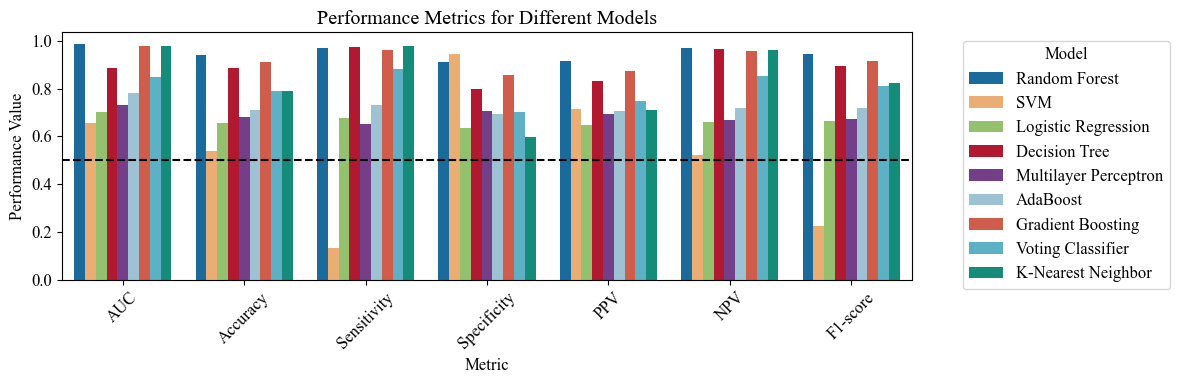

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Assume your performance metrics matrix is ready and named metrics_df

# Convert the performance metrics matrix from wide format to long format
metrics_long_df = metrics_df.reset_index().melt(id_vars='index', var_name='Model', value_name='Performance')
metrics_long_df.rename(columns={'index': 'Metric'}, inplace=True)  # Change column names to enhance readability

# Specify colors
colors = [
    "#0571b0", "#fdae61", "#91cf60", "#ca0020", "#7b3294", 
    "#92c5de", '#E64B35FF', '#4DBBD5FF', '#00A087FF'
]

# Set figure size to make it wider and less tall
plt.figure(figsize=(12, 4))

# Plot a clustered bar chart
sns.barplot(
    x='Metric', 
    y='Performance', 
    hue='Model', 
    data=metrics_long_df, 
    palette=colors
)

# Add a title to the figure and labels to the axes
plt.title('Performance Metrics for Different Models')
plt.ylabel('Performance Value')
plt.xlabel('Metric')

# Rotate the x-axis labels to enhance readability
plt.xticks(rotation=45)

# Add a black reference line at y = 0.5
plt.axhline(0.5, color='black', linestyle='--')

# Place the legend outside the figure and add a title to the legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc=2)

# Adjust the layout
plt.tight_layout()

# Save the figure to a PDF file
plt.savefig('Fig3A.pdf', bbox_inches='tight')

# Display the figure
plt.show()